# Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Data Preperation

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

In [18]:
feature_names = data.feature_names

In [19]:
print(f"Dataset features: {feature_names}")
print(f"Shape of dataset: {X.shape}")

Dataset features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Shape of dataset: (569, 30)


## Map labels for anomaly detection
### Malignant (0) -> Anomalies (1), Benign (1) -> Normal (0)

In [7]:
y = np.where(y == 0, 1, 0)

## Standardize the datasets

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Building the Model
## Train the Isolation Forest model

In [10]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [11]:
# Predict anomalies
y_pred = iso_forest.predict(X_scaled)
y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert -1 to 1 (anomaly) and 1 to 0 (normal)

In [12]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred))


Confusion Matrix:
[[174  38]
 [338  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.82      0.48       212
           1       0.33      0.05      0.09       357

    accuracy                           0.34       569
   macro avg       0.34      0.44      0.29       569
weighted avg       0.34      0.34      0.24       569



### Visualization: PCA to reduce dimensions for plotting

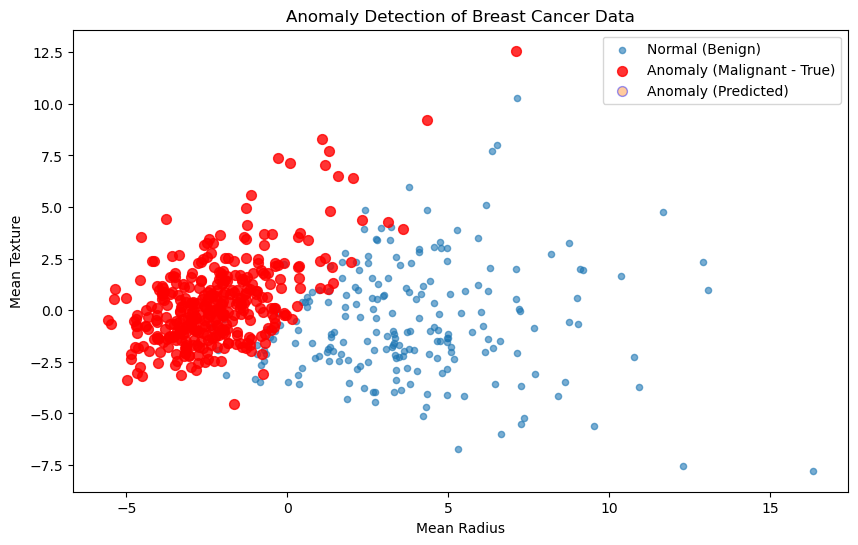

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(
    X_pca[y == 0, 0], X_pca[y == 0, 1], label="Normal (Benign)", alpha=0.6, s=20
)
plt.scatter(
    X_pca[y == 1, 0], X_pca[y == 1, 1], label="Anomaly (Malignant - True)", alpha=0.8, s=50, color="red"
)
plt.scatter(
    X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], label="Anomaly (Predicted)", alpha=0.4, s=50, edgecolors="blue"
)
plt.title("Anomaly Detection of Breast Cancer Data")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.legend()
plt.show()